In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d  # Optional, for 3D visualization
import matplotlib.cm as cm
import pandas as pd


In [11]:
# Read the DataFrame from the CSV file
df = pd.read_csv('colmap_metrics.csv')

# Print the first 5 rows of the DataFrame
print(df.head())

         Date  Plant  Images  Registered images  Points  Observations  \
0  2024-07-30    A-1     352                352  105019       1310966   
1  2024-07-30    A-2     347                347   78089       1150782   
2  2024-07-30    A-3       2                  2      77           154   
3  2024-07-30  A-3-2       2                  2      77           154   
4  2024-07-30    A-4     373                373   63843        743605   

   Mean track length  Mean observations per image  Mean reprojection error  
0          12.483132                  3724.335227                 0.558773  
1          14.736800                  3316.374640                 0.621446  
2           2.000000                    77.000000                 0.325023  
3           2.000000                    77.000000                 0.325023  
4          11.647401                  1993.579088                 0.651926  


In [16]:

# Convert 'Date' field to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert relevant fields to numeric (though they already appear to be in numeric format)
df['Images'] = pd.to_numeric(df['Images'])
df['Registered images'] = pd.to_numeric(df['Registered images'])
df['Points'] = pd.to_numeric(df['Points'])
df['Observations'] = pd.to_numeric(df['Observations'])
df['Mean track length'] = pd.to_numeric(df['Mean track length'])
df['Mean observations per image'] = pd.to_numeric(df['Mean observations per image'])
df['Mean reprojection error'] = pd.to_numeric(df['Mean reprojection error'])


In [19]:
# sort the data based on the date
df = df.sort_values(by='Date')
# filter the data based on the date. Only dates up to and including 2024-08-08 are considered
df = df[df['Date'] <= '2024-08-08']

print(df.tail())

          Date Plant  Images  Registered images  Points  Observations  \
138 2024-08-08   C-2     542                542  134245       2921609   
139 2024-08-08   C-3     389                389  191637       2482401   
133 2024-08-08   B-2     353                353  181635       2210414   
130 2024-08-08   A-4     421                421  220805       3181753   
141 2024-08-08   C-5       2                  2     290           580   

     Mean track length  Mean observations per image  Mean reprojection error  
138          21.763261                  5390.422509                 0.608189  
139          12.953662                  6381.493573                 0.561653  
133          12.169538                  6261.796034                 0.537250  
130          14.409787                  7557.608076                 0.540215  
141           2.000000                   290.000000                 0.291870  


In [20]:
# filter the data based on the imaged. Everything lower than 100 images is discarded
df = df[df['Images'] >= 100]

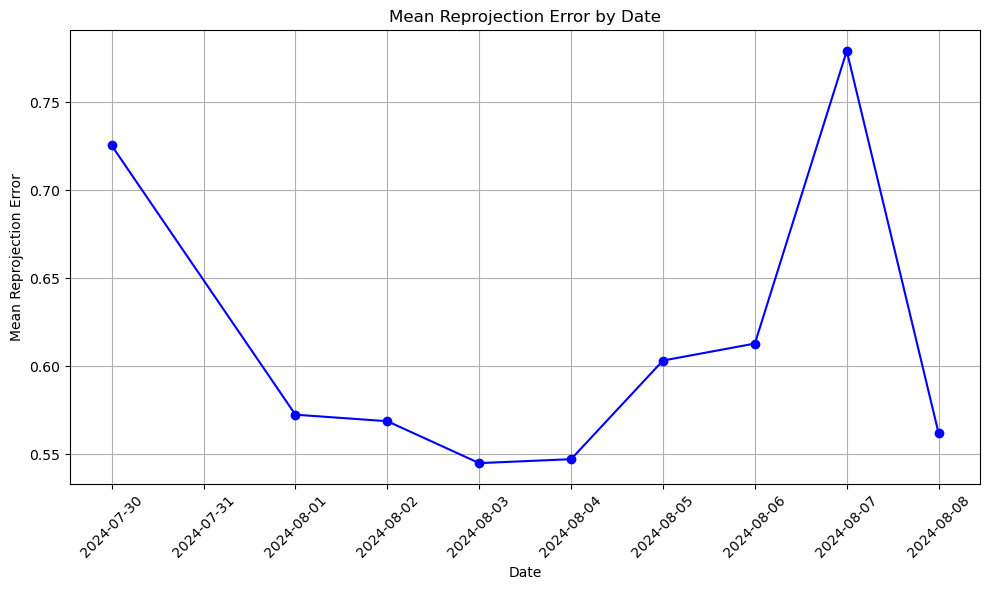

In [21]:
# Group by 'Date' and calculate the mean of 'Mean reprojection error'
df_avg = df.groupby('Date')['Mean reprojection error'].mean().reset_index()

# Plot the average mean reprojection error by date
plt.figure(figsize=(10, 6))
plt.plot(df_avg['Date'], df_avg['Mean reprojection error'], marker='o', linestyle='-', color='b')
plt.title('Mean Reprojection Error by Date')
plt.xlabel('Date')
plt.ylabel('Mean Reprojection Error')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

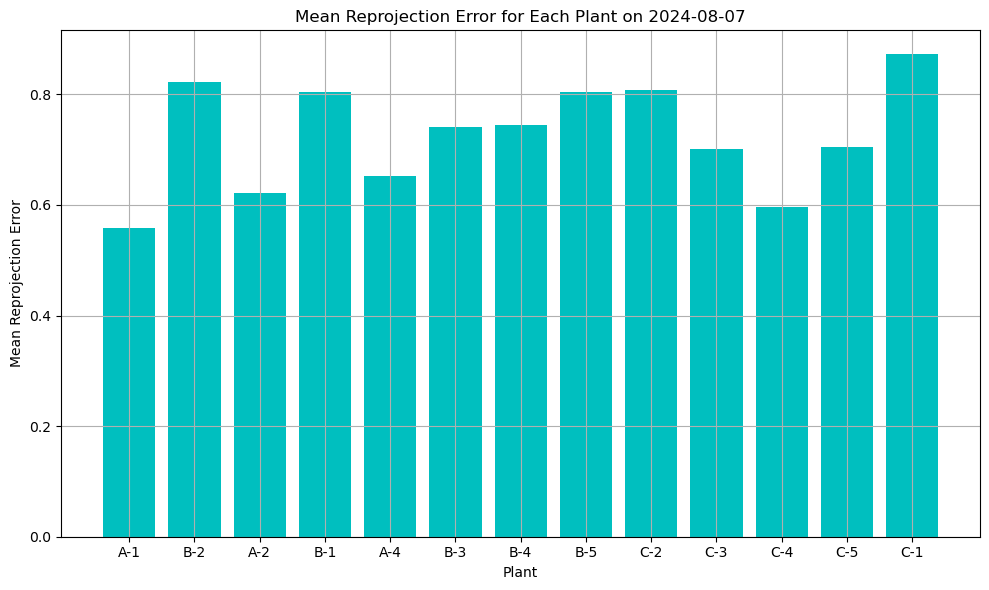

In [23]:
# Filter for the date '2024-08-07'
df_filtered = df[df['Date'] == '2024-07-30']

# Plot the mean reprojection error for each plant on the specified date
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['Plant'], df_filtered['Mean reprojection error'], color='c')
plt.title('Mean Reprojection Error for Each Plant on 2024-08-07')
plt.xlabel('Plant')
plt.ylabel('Mean Reprojection Error')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

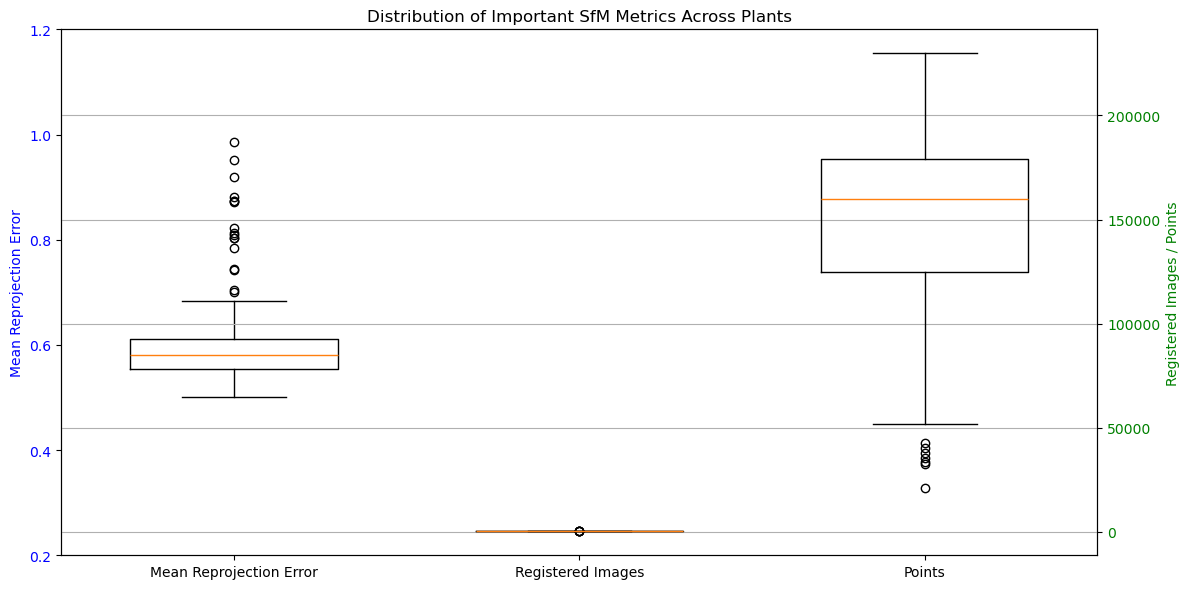

In [30]:
# Creating a boxplot with two y-axes to handle different scales using matplotlib

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the 'Mean reprojection error' on the primary y-axis
ax1.boxplot(df['Mean reprojection error'], positions=[1], widths=0.6)
ax1.set_ylabel('Mean Reprojection Error', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0.2, 1.2)  # Setting a suitable limit for reprojection error

# Creating a second y-axis for 'Registered images' and 'Points'
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
ax2.boxplot([df['Registered images'], df['Points']], positions=[2, 3], widths=0.6)
ax2.set_ylabel('Registered Images / Points', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Setting the tick positions and labels for the x-axis
plt.xticks([1, 2, 3], ['Mean Reprojection Error', 'Registered Images', 'Points'])

# Add gridlines and titles
plt.title('Distribution of Important SfM Metrics Across Plants')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [31]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Mean reprojection error'].quantile(0.25)
Q3 = df['Mean reprojection error'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 times the IQR from the quartiles
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows that have outliers in 'Mean reprojection error'
outliers = df[(df['Mean reprojection error'] < lower_bound) | (df['Mean reprojection error'] > upper_bound)]

# Display the outlier rows
outliers


,Date,Plant,Images,Registered images,Points,Observations,Mean track length,Mean observations per image,Mean reprojection error
8,2024-07-30,B-2,348,348,33776,327917,9.708580,942.290230,0.822195
7,2024-07-30,B-1,392,392,38028,328733,8.644499,838.604592,0.803985
9,2024-07-30,B-3,221,221,21273,156601,7.361491,708.601810,0.741938
10,2024-07-30,B-4,320,320,42588,413108,9.700103,1290.962500,0.743990
11,2024-07-30,B-5,314,314,40119,380564,9.485880,1211.987261,0.803563
13,2024-07-30,C-2,306,306,35479,400749,11.295386,1309.637255,0.808644
14,2024-07-30,C-3,309,309,51765,560612,10.829943,1814.278317,0.700711
16,2024-07-30,C-5,381,381,98729,1057171,10.707806,2774.727034,0.704450
12,2024-07-30,C-1,351,351,32571,348163,10.689356,991.917379,0.872307
112,2024-08-07,A-1,527,527,69691,1673220,24.009126,3174.990512,0.986418


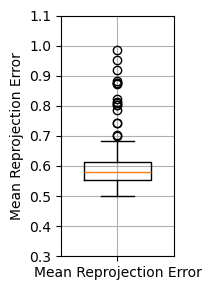

In [46]:
# Adjusting the plot to only show the 'Mean reprojection error'

fig, ax = plt.subplots(figsize=(2, 3))

# Plotting only 'Mean reprojection error'
ax.boxplot(df['Mean reprojection error'], widths=0.6)
ax.set_ylabel('Mean Reprojection Error', color='black')
ax.tick_params(axis='y', labelcolor='black')
ax.set_ylim(0.3, 1.1)  # Adjusting limits for better visualization

# Set the x-axis label and title
ax.set_xticks([1])
ax.set_xticklabels(['Mean Reprojection Error'])
# plt.title('Distribution of Mean Reprojection Error')

# Add gridlines
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [41]:
# Compute the mean of the 'Mean reprojection error' column
mean_reprojection_error = df['Mean reprojection error'].mean()

# Print the computed value
print(f"Mean Reprojection Error: {mean_reprojection_error}")


Mean Reprojection Error: 0.6119239349593497
